## QuantumCircuits

In [ ]:
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 8.5MB 6.3MB/s 
     |████████████████████████████████| 17.6MB 254kB/s 
     |████████████████████████████████| 204kB 54.0MB/s 
     |████████████████████████████████| 204kB 55.9MB/s 
     |████████████████████████████████| 2.1MB 53.1MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 1.0MB 47.1MB/s 
     |████████████████████████████████| 194kB 54.1MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 583kB 31.3MB/s 
     |████████████████████████████████| 3.2MB 41.5MB/s 
     |████████████████████████████████| 5.5MB 42.1MB/s 
  Created wheel for qiskit: filename=qiskit-0.24.1-cp37-none-any.whl size=2919 sha256=b88b377110270c543dd92e304589cb867d8ea8dcdd113c1a560c7c6d46cbdbb8
  Stored in directory: /root/.cache/pip/wheels/4a/3e/be/606704f95c92255208f2c6c571d95cc075a12d8672515ec7a5
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2

* __Opaque Gate__

In [ ]:
from qiskit import *
from qiskit.circuit import Gate

my_gate = Gate(name='my_gate', num_qubits=2, params=[])

In [ ]:
qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw()

┌──────────┐            
q_0: ┤0         ├────────────
     │  my_gate │┌──────────┐
q_1: ┤1         ├┤0         ├
     └──────────┘│  my_gate │
q_2: ────────────┤1         ├
                 └──────────┘

* __Composite Gates__

In [ ]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  


┌───┐                       
q_0: ┤ H ├──■────────────────────
     └───┘┌─┴─┐     ┌───────────┐
q_1: ─────┤ X ├──■──┤0          ├
          └───┘┌─┴─┐│  sub_circ │
q_2: ──────────┤ X ├┤1          ├
               └───┘└───────────┘

In [ ]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw()

┌─────────┐                                         
q_0: ┤ U2(0,π) ├──■──────────────────────────────────────
     └─────────┘┌─┴─┐     ┌───┐          ░ ┌────────────┐
q_1: ───────────┤ X ├──■──┤ H ├────■─────░─┤ U3(1,2,-2) ├
                └───┘┌─┴─┐└───┘┌───┴───┐ ░ └───┬───┬────┘
q_2: ────────────────┤ X ├─────┤ RZ(1) ├─░─────┤ I ├─────
                     └───┘     └───────┘ ░     └───┘

* __Parametrized Circuit__

In [ ]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw()

┌───┐                     ░ ┌───────┐ ░                     ┌───┐┌─┐
q_0: ┤ H ├──■──────────────────░─┤ RZ(θ) ├─░──────────────────■──┤ H ├┤M├
     └───┘┌─┴─┐                ░ ├───────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: ─────┤ X ├──■─────────────░─┤ RZ(θ) ├─░─────────────■──┤ X ├──────╫─
          └───┘┌─┴─┐           ░ ├───────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: ──────────┤ X ├──■────────░─┤ RZ(θ) ├─░────────■──┤ X ├───────────╫─
               └───┘┌─┴─┐      ░ ├───────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: ───────────────┤ X ├──■───░─┤ RZ(θ) ├─░───■──┤ X ├────────────────╫─
                    └───┘┌─┴─┐ ░ ├───────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: ────────────────────┤ X ├─░─┤ RZ(θ) ├─░─┤ X ├─────────────────────╫─
                         └───┘ ░ └───────┘ ░ └───┘                     ║ 
c: 1/══════════════════════════════════════════════════════════════════╩═
                                                                       0

In [ ]:
print(qc.parameters)

{Parameter(θ)}


* __Operators__

* __Transpiler__

In [ ]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

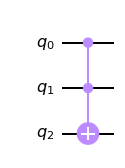

In [ ]:
circ = QuantumCircuit(3)
circ.ccx(0, 1, 2)
circ.draw(output='mpl')

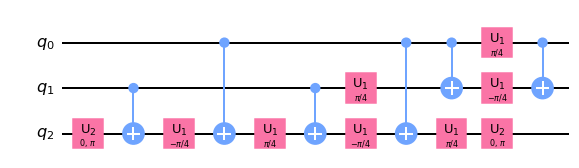

In [ ]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(circ)
new_circ.draw(output='mpl')

* __Qiskit Pulses__

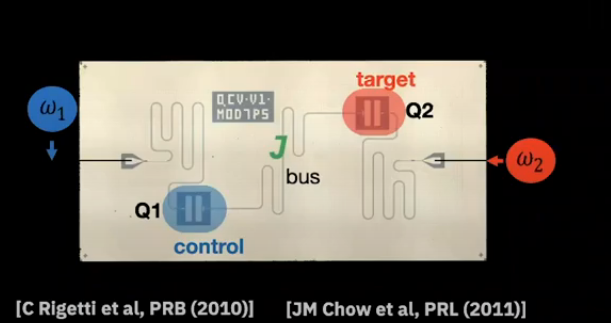

[Qiskit Pulse: Programming Quantum Computers Through the Cloud with Pulses](https://www.youtube.com/watch?v=V_as5PufUiU)

In [ ]:
token ='2f30d3d563b85c01d544fb21977ed146a2e5c96242666e2163cb0161029177c3b8d0735c041d736a75fe5844b5f454fba7cece9340d1691b9f8535c33e6dc4d7'

In [ ]:
IBMQ.save_account(token)    
 

provider = IBMQ.load_account()
 

backend = provider.get_backend('ibmq_lima')     #we use ibmq_16_melbourne quantum device 

configrc.store_credentials:WARNING:2021-03-30 13:47:22,422: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-03-30 13:47:22,688: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(1)
qc.cx(1, 0)
qc.measure([0, 1], [0, 1])
qc = transpile(qc, backend)
pulse_schedule = schedule(qc, backend)
# Plot the program representations.
qc.draw()


global phase: π/4
                                           ┌───┐┌─┐   
      q_0 -> 0 ────────────────────────────┤ X ├┤M├───
               ┌─────────┐┌────┐┌─────────┐└─┬─┘└╥┘┌─┐
      q_1 -> 1 ┤ RZ(π/2) ├┤ √X ├┤ RZ(π/2) ├──■───╫─┤M├
               └─────────┘└────┘└─────────┘      ║ └╥┘
ancilla_0 -> 2 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_1 -> 3 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_2 -> 4 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
          c: 2/══════════════════════════════════╩══╩═
                                                 0  1

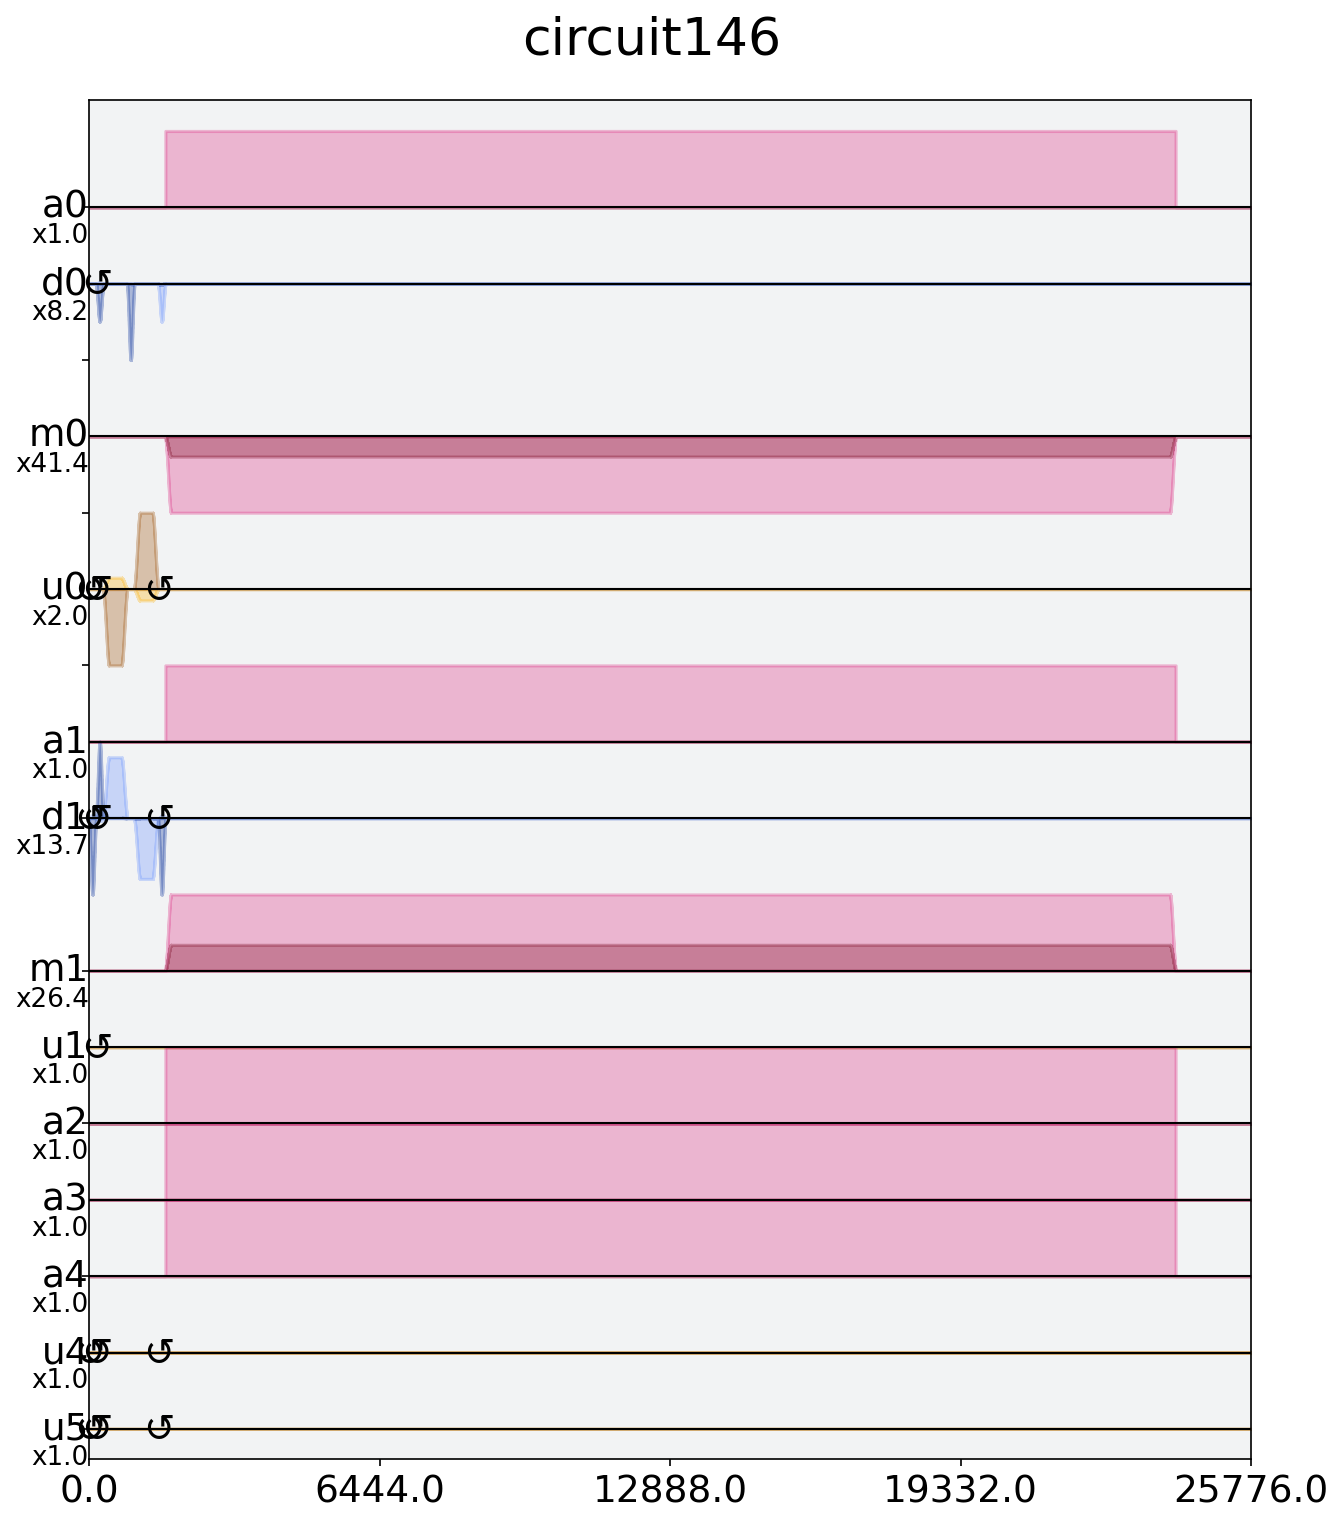

In [ ]:
pulse_schedule.draw()

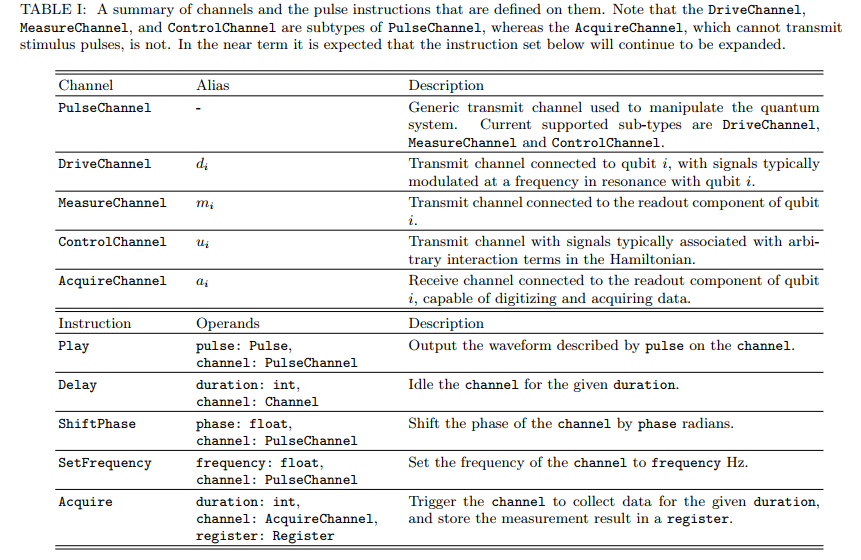

## Multipartite Entanglement

For a quantum circuit with $n \geq 3$ qubits, we can have states called **multi-partite entanglement states**. These are states with three or more qubits (or subsystems) which are not fully entangled, and not fully separable either. In the Bell states, we only have two qubits, which are entangled. In the following examples we will look at some concrete examples of three and four qubit systems which exhibit more complicated behavior. We will also discuss larger systems of qubits which generalize these three and four qubit systems. 

We call a system of $n$ qubits **fully separable** if the state vector can be written in the form

\begin{align}
|\psi\rangle = |\psi_0\rangle \otimes |\psi_1\rangle \otimes \cdots \otimes |\psi_{n-1}\rangle.
\end{align}

If it cannot be written in this form it may have **multipartite entanglement**. 

### W States

A $W$-state is a three qubit entangled state of the following form:

\begin{align}
|W\rangle = \frac{1}{\sqrt{3}}\left(|001\rangle + |010\rangle + |100\rangle \right).
\end{align}

As a first step in understanding the properties of the $W$-state, let's try creating this state using a quantum circuit in QISKit. First, we should import a few things. 

In [ ]:
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
# Import Aer
from qiskit import Aer
import numpy as np
from qiskit.visualization import plot_histogram

Now, we will need to define a unitary gate that is not already predefined in QISKit. QISKit, as we have seen, already has a standard set of gates such as the Pauli gates, the Hadamard gates, the CNOT-gate, and several others. Each one takes one or more qubits as an argument to specifify which qubits it should operate on, and some of the gates take other agruments such as angles for rotations. We need to define a new gate that will operate on a single qubit in a three qubit system. To do this, we will first need to define an `Operator`in QISKit, which is $2 \times 2$ since it only operates on a single qubit. 

In [ ]:
MG = Operator([[np.sqrt(1/3), -np.sqrt(2/3)],
               [np.sqrt(2/3), np.sqrt(1/3)]])

Next, let's define a three qubit, and three classical bit `QuantumCircuit` in QISKit. 

In [ ]:
qc = QuantumCircuit(3)

Now, we will define our unitary gate. It takes three arguments, `MG` the `Operator` we defined above, along with an array specifying which qubit(s) to operate on, and a `label`. 

In [ ]:
qc.unitary(MG, [0], label='G')

Let's draw our circuit so far. We should see the unitary gate we have defined applied to the first qubit. 

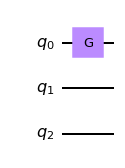

In [ ]:
qc.draw(output='mpl')

Next, we apply a controlled-Hadamard gate to the first and second qubit with the first qubit as the control qubit and the second qubit as the target qubit. 

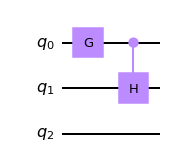

In [ ]:
qc.ch(0,1)
qc.draw(output='mpl')

Finally, we apply a **CCX**-gate with the target on the third qubit. 

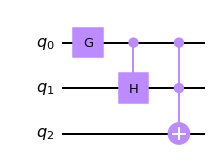

In [ ]:
qc.ccx(0,1,2)
qc.draw(output='mpl')

Let's define one last custom unitery gate. It is a permutation matrix meant to permute the amplitudes of the curcuit. The permutation can be written in cycle notation as, 

\begin{align}
\sigma = (1,2,3)(4)(5,8)(6)(7).
\end{align}

In [ ]:
permute = Operator([[0, 0, 1, 0, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1, 0, 0, 0]])

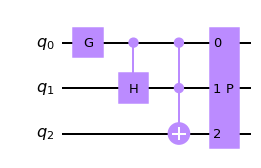

In [ ]:
qc.unitary(permute, [0,1,2], label='P')
qc.draw(output='mpl')

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution
job = execute(qc, backend)

result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

[3.53525080e-17-8.06876973e-17j 5.77350269e-01-3.53525080e-17j
 5.77350269e-01-4.72557231e-17j 0.00000000e+00+0.00000000e+00j
 5.77350269e-01+5.72278804e-17j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]


The state vector (approximated to three decimal places above) is,

\begin{align}
|W\rangle = 
\begin{pmatrix}
0\\
1/\sqrt{3}\\
1/\sqrt{3}\\
0 \\
1/\sqrt{3}\\
0 \\
0 \\
0 \\
\end{pmatrix} =
\frac{1}{\sqrt{3}}\left(|001\rangle + |010\rangle + |100\rangle \right).
\end{align}

If we would like to verify this by measuring the circuit to see which states we get out after say, $2048$ shots we can add measurments to the circuit. 

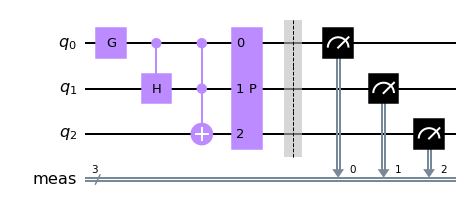

In [ ]:
qc.measure_all()
qc.draw(output='mpl')

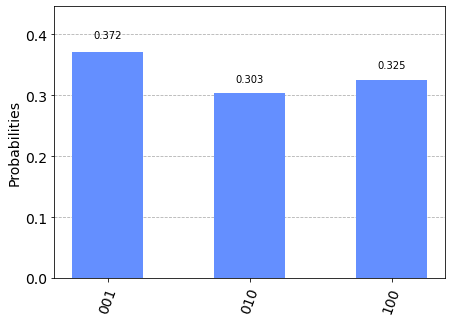

In [ ]:
backend2 = Aer.get_backend('qasm_simulator')
shots2 = 2048
results2 = execute(qc, backend=backend2, shots=shots2).result()
answer2 = results2.get_counts()

plot_histogram(answer2)

As we can see, we measure the three states $|001\rangle, |010\rangle,$ and $|100\rangle$, each $1/3 = (1/\sqrt{3})^2$ of the time. Since this was run on a simulator the results are perfect. We don't need to run this on an actual quantum computer since there are only three qubits, but we certainly could by simply defining a different backend device. 

The interesting thing to notice about the three-qubit $W$-state is that measurement of only a single qubit leaves us with an entangled pair of qubits that is not destroyed by measurment. This is not the case with the next states we discuss, the **GHZ states**. This means $W$-states are in some sense more robust against noise and measurement because loss of a single qubit does not completely destry the entanglement. This can be used to encode logical qubits into three physical qubits for error correction protocols, which we will discuss in later chapters. $W$-states can be generalized to more than three qubits as follows:

\begin{align}
|W_n\rangle = \frac{1}{\sqrt{n}}(|00\cdots 01\rangle + |00\cdots 10\rangle + \cdots + |01\cdots 00\rangle +|10\cdots 00\rangle).
\end{align}

This is a "*one-hot encoding*" and in general is not simple to construct using circuits. The reason for this is, many quantum computers are restricted in what gates they can implement directly. All other gates, such as the custom gates that we constructed for the three-qubit state $|W_3\rangle$. Remember, we construct a custom unitary gate

\begin{align}
G(1/3) = 
\begin{pmatrix}
1/\sqrt{3} & -2/\sqrt{3} \\
2/\sqrt{3} & 1/\sqrt{3}
\end{pmatrix}
\end{align}

along with the amplitude permutation gate, 

\begin{align}
\sigma = 
\begin{pmatrix}
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 
\end{pmatrix}.
\end{align}

These two gates are not standard gates and must be approximated by other gates that are standard. The set of standard gates available depends on the hardware backend, and different quantum computers will approximate other gates to varying efficiencies. There is a famous result known as the **Solovay-Kitaev Theorem** and related approximation theorems that state that with an appropriate set of gates, any other gate can be *efficiently* approximated. We will not go into the details of the exact notion of efficiency here. Using standard gates, we can construct a $W_n$-state, but some of the algorithms get a little complicated for large $n$ which are not powers of $2$. Before moving on to GHZ-states, let's have a look at the state $|W_4\rangle$ for a four-qubit system. 

### GHZ States

**Greenberger–Horne–Zeilinger states (GHZ states)** are much simpler to construct than the $W$-states from the previous section. For any $n \geq 3$ the general GHZ-state has the form, 

\begin{align}
|GHZ\rangle = \frac{|0\rangle^{\otimes n}+|1\rangle^{\otimes n}}{\sqrt{2}}.
\end{align}

So, the three-qubit GHZ-state is,

\begin{align}
|GHZ_3\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}.
\end{align}

We can construct this state in QISKit as follows. First, let's define a `QuantumCircuit` with three qubits. 

In [ ]:
circuit = QuantumCircuit(3)

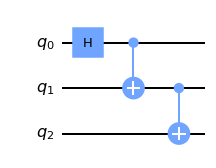

In [ ]:
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.draw(output='mpl')

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution
job = execute(circuit, backend)

result = job.result()

outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


As expected the ouptut amplitude vector is, 

\begin{align}
\begin{pmatrix}
1/\sqrt{2}\\
0\\
0\\
0\\
0\\
0\\
0\\
1/\sqrt{2}
\end{pmatrix} = 
\frac{|000\rangle + |111\rangle}{\sqrt{2}}.
\end{align}

So, if we measure the circuit and plot the histogram, we should expect to see $|000\rangle$ about $1/2$ of the time, and $|111\rangle$ about $1/2$ of the time. 

## Graph States

There are more complicated multipartite entangled states known as **graph states**. Graph states are specified by a graph $G$ with vertices $V$ representing qubits, and edges $E$ connecting them. A graph state is often denote by $|G\rangle$. In order to construct $∣G\rangle$ using a quantum circuit, one prepares the initial state on all qubits to be $∣+\rangle^{\otimes}. Recall, the state

\begin{align}
|+⟩=\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}, 
\end{align}

can be prepared using Hadamard gates on the initial qubit state $|0\rangle$. Next, for the graph $G = (V,E)$ we apply the controlled-$Z$ gate

\begin{align}
|0\rangle \langle 0∣ \otimes I + ∣1\rangle \langle 1∣ \otimes Z = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
\end{align}

to every pair of qubits that are connected by an edge $e \in E$ of the graph $G$. The order in which we apply these controlled-$Z$ gates is arbitrary since they all commute with one another. A graph state can be represented as

\begin{align}
|G\rangle = \left(\bigotimes_{e \in E}U_e\right)|+\rangle^{\otimes |V|}
\end{align}

where $e = \{x, y\} \in E$ is an edge connecting vertex $x$ and vertex $y$. $U_e$ is a controlled-$Z$ gate with control qubit corresponding to $x$ and target qubit corresponding to $y$. The number of qubits is $|V|$, the size of the vertex set. 

We can also define a graph state as a stabilizer code using the following operators,

\begin{align}
S_v = X_v \otimes \left(\bigotimes_{u \in Adj(v)} Z_{u}\right)
\end{align}

where $X_v$ is the Pauli-$X$ gate on the qubit corresponding to the vertex $v \in V$; $Adj(v)$ denotes the set of all vertices adjacent to $v$; $Z_{u}$ is the Pauli-$Z$ gate applied to the qubit corresponding to the vertex $u \in V$. The **graph state** is then the $+1$-eigenvalue eigenstate of the set of operators $\{S_v\}_{v \in V}$. This means 

\begin{align}
S_v|G\rangle = |G\rangle. 
\end{align}

We will discuss *stabilizer codes* later on when we discuss error-correction. 

### Path Graphs $P_n$

For now, let's prepare the graph state on four qubits corresponding to the following graph $P_4$. 

\begin{align}
V &= \{0, 1, 2, 3\}\\
E &= \{\{0,1\}, \{1,2\}, \{2,3\}\}.
\end{align}

We will need NetworkX to create and draw the graphs. 

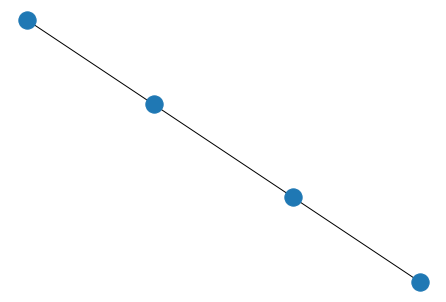

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.path_graph(4)
nx.draw(G)
plt.show()

First, let's construct a quantum register and define a circuit with four qubits. 

In [ ]:
qr = QuantumRegister(4)
graph_circ = QuantumCircuit(qr)

Next, let's build a simple function that prepares each qubit in a superposition state

\begin{align}
H|0\rangle = |+\rangle = \frac{(|0\rangle + |1\rangle)}{\sqrt{2}}.
\end{align}

In [ ]:
def prepare_state(circ, n):
    for j in range(n):
        circ.h(j)

Now, let's apply this to our circuit and draw the circuit. 

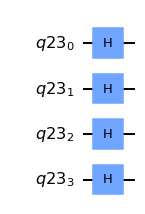

In [ ]:
prepare_state(graph_circ, 4)
graph_circ.draw(output='mpl')

Next, we need to apply controlled-$Z$ gates to each pair of qubits connected by an edge in the graph. We can construct a simple function to do this for this graph. 

In [ ]:
def path_connect(circ, n):
    for j in range(n-1):
        graph_circ.cz(j,j+1)

Apply this to our circuit and drawing the circuit. 

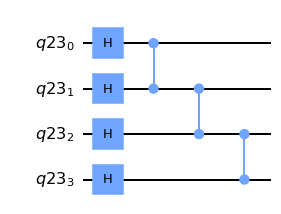

In [ ]:
path_connect(graph_circ, 4)
graph_circ.draw(output='mpl')